## Pedestrian space

In [3]:
import pandas as pd
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import osmnx as ox
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from pyproj import Proj, Transformer

In [4]:
# Define paths
ITF_geospatial = 'C:/Users/marno/Documents/Python Projects/paris-roadspace/data/geospatial/ITF/'
APUR_geospatial = 'C:/Users/marno/Documents/Python Projects/paris-roadspace/data/geospatial/APUR/'
RESULTS = 'C:/Users/marno/Documents/Python Projects/paris-roadspace/results/'
ox_geocode = 'Paris, France' 

### Load

In [5]:
troncon = gpd.read_file(APUR_geospatial+'filaire_voie_paris.gdb')

In [6]:
troncon.columns

Index(['n_sq_tv', 'c_niveau', 'c_domofftv', 'b_voiedup', 'n_voieaddg',
       'c_suf1addg', 'n_voieadfg', 'c_suf1adfg', 'n_voieaddd', 'c_suf1addd',
       'n_voieadfd', 'c_suf1adfd', 'c_coinsee', 'n_sq_co', 'n_sq_vo',
       'niv_sollicitation', 'largeur_minimum_t1', 'largeur_maximum_t1',
       'largeur_moyenne_t1', 'methode_calcul_t1', 'largeur_minimum_t2',
       'largeur_maximum_t2', 'largeur_moyenne_t2', 'methode_calcul_t2',
       'periode_construction', 'st_length_shape', 'shape_Length', 'geometry'],
      dtype='object')

In [48]:
len(troncon)

25013

In [38]:
(troncon.n_sq_tv == 750612817).idxmax()

7854

(642326.6603149961, 661972.4113850031, 6857005.439584999, 6867554.640115001)

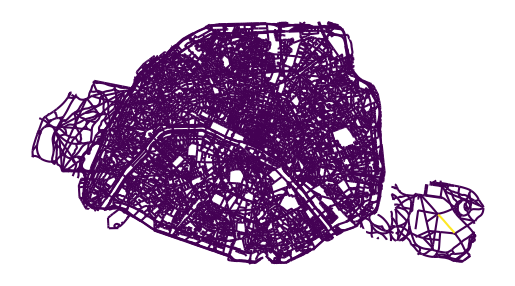

In [54]:
troncon['mark'] = 0
troncon.at[17261, 'mark'] = 1
troncon.plot(column='mark')
plt.axis('off')

In [26]:
troncon.shape_Length.idxmax()

17261

In [40]:
geom = troncon.iloc[17261].geometry
troncon.iloc[17261].shape_Length

978.4777314833365

In [42]:
troncon.iloc[17261].largeur_moyenne_t2

10.58650139

## Total trottoir surface

In [58]:
TYPE = "moyenne"
total_surface = 0
troncon['t1_sq'] = troncon[f"largeur_{TYPE}_t1"] * troncon.shape_Length
troncon['t2_sq'] = troncon[f"largeur_{TYPE}_t2"] * troncon.shape_Length
troncon['t_sq'] = troncon['t1_sq'] + troncon['t2_sq']
troncon.t_sq.sum() * 0.0001

3558.6668243701474

<Axes: xlabel='shape_Length', ylabel='Count'>

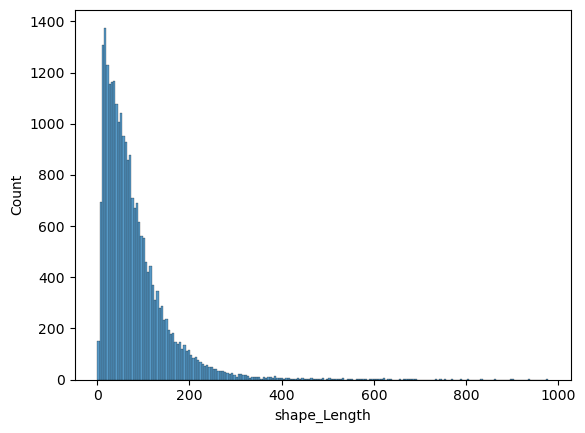

In [50]:
sns.histplot(troncon.shape_Length)

In [52]:
troncon.shape_Length.idxmax()

17261

In [53]:
troncon.iloc[17261]

n_sq_tv                                                         750617725
c_niveau                                                                0
c_domofftv                                                              P
b_voiedup                                                               N
n_voieaddg                                                           41.0
c_suf1addg                                                           None
n_voieadfg                                                            0.0
c_suf1adfg                                                           None
n_voieaddd                                                           50.0
c_suf1addd                                                           None
n_voieadfd                                                           80.0
c_suf1adfd                                                           None
c_coinsee                                                           75056
n_sq_co                               